In [2]:
import sympy as sp
import pylab as pl
from AuxDisplay import *
from itertools import product

import NURBS as nb

sp.init_printing(use_latex=True)

%matplotlib inline

# Definindo funções bases B-Spline

## 2.1 - Funções B-spline

Para um vetor de knots $\Xi$:

\begin{equation}
    \Xi = [\xi_0, \xi_1, ..., \xi_{n+p+1}]
\end{equation}

A i-ésima função de base B-spline de grau p, denotada por $N_{i, p}(x)$, é definida como:

\begin{equation}
N_{i,0}(x) = \left\{
\begin{matrix} 
1 & \mathrm{se} \quad \xi_i \leq x < \xi_{i+1} \\
0 & \mathrm{c.c.} 
\end{matrix}
\right.
\end{equation}

Para $p = 1, 2, ...$, define-se:

\begin{equation}
N_{i,p}(x) = \frac{x - \xi_i}{\xi_{i+p} - \xi_i} N_{i,p-1}(x) + \frac{\xi_{i+p+1} - x}{\xi_{i+p+1} - \xi_{i+1}} N_{i+1,p-1}(x)
\end{equation}

### Exemplo 1

\Xi  = [0  0  0  0.5  1  1  1]

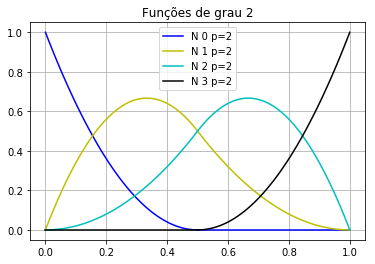

In [5]:
p = 2

knots = [0, 0, 0, 0.5, 1, 1, 1]
displayEq('\Xi', sp.Array(knots))

B = nb.BasesNURBS(knots, p)

B.plotBase()

# for Ni in N:
#     Ni.plot('N\'')
# plotShow()

# for Ni in N:
#     Ni.diff(x).plot('N\'')
# plotShow(title='Derivadas de das funçoes de grau %d'%p)

# for Ni in N:
#     X = pl.linspace(0, 1, 100)
#     Ni_ = Ni.diff(x)
#     pl.plot(X, [Ni_.integrate(x, 0, xi) for xi in X], label='N')
# plotShow(title='Integrais das derivadas de das funçoes de grau %d'%p)

## Montando matrizes locais e globais

\Xi  = [0  0  0  0.5  1  1  1]

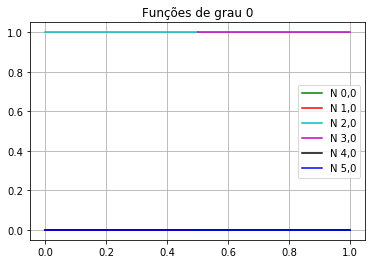

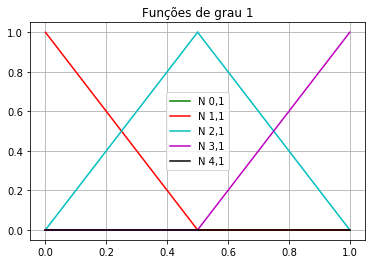

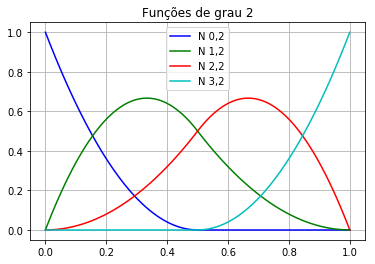

In [18]:
n = 4
p = 2
x = sp.Symbol('x')

knots = (0, 0, 0, 0.5, 1, 1, 1)
displayEq('\Xi', sp.Array(knots))

# Pontos de controle em x
cp_x = (0.0, 0.5, 1.5, 2.0)

knt_spans = [(0, 3), (3, 6)]

N = funcoesBases(p, knots, plotar=True)[-1]

In [19]:
A, E, rho, g = sp.var('A, E, rho, g')
def matrizes_locais(m, knots, cp_x, knt_spans):
    k = []
    f = []
    for ki, ks in enumerate(knt_spans):
#         print('ks:', ks)
        x_inf, x_sup = knots[ks[0]], knots[ks[1]]
        cp_x_ks = cp_x[ki: ki+p+1]
        N_ks    =    N[ki: ki+p+1]
        
#         for i, n in enumerate(N_ks):
#             n.plot('N %d'%i)
#         pl.xlim(x_inf, x_sup)
#         plotShow()
        print('cp_x_ks:', cp_x_ks)
#         print('[%f, %f]'%(x_inf, x_sup))

        J = sum(N_ks[i].diff(x) * cp_x_ks[i] for i in range(m))
#         J.display('J')

        k.append( sp.zeros(3) )
        f.append(sp.zeros(3, 1))
        for i, j in product(range(m), repeat = 2):
            k[-1][i, j] += (N_ks[i].diff(x) * N_ks[j].diff(x) // J).integrate(x, x_inf, x_sup)
            # dNj = N_ks[i] * N_ks[j].diff(x)
            # k[-1][i, j] -= (dNj.at(x_sup) - dNj.at(x_inf))

        for i in range(m):
            # Vezes o jacobiano??
            f[-1][i] = (N_ks[i] * J).integrate(x, x_inf, x_sup)
            
        displayEq('k_{%d}'%ki, k[-1])
        displayEq('f_{%d}'%ki, f[-1])
        
    return k, f

In [20]:
def construir_matriz_global():
    m = p + 1
    M = m + 1
    K = sp.zeros(M)
    F = sp.zeros(M, 1)

    k, f = matrizes_locais(m, knots, cp_x, knt_spans)

    # iel = tuple((x, x+1) for x in range(len(k)))

    for i, kfi in enumerate(zip(k, f)):
        ki, fi = kfi
        for l in range(m):
            for c in range(m):
                K[l+i, c+i] += ki[l, c]
            F[l+i] += fi[l]
#             print('F[%d] <- f%d[%d]'%(l+i, i, l))

    #     # elementos aleijados
    #     s.m_global[ s.iel[ 0][ 0], s.iel[ 0][ 0] ] += sp.integrate(sp.diff(s.bases[1](x), x) ** 2, (x, 0, h)).subs({h:s.elementos[ 0].h})
    #     s.m_global[ s.iel[-1][-1], s.iel[-1][-1] ] += sp.integrate(sp.diff(s.bases[0](x), x) ** 2, (x, 0, h)).subs({h:s.elementos[-1].h})

    #     s.f_global[ s.iel[ 0][ 0] ] += sp.integrate(f(x                 ) * s.bases[1](x), (x, 0, h)).subs({h:s.elementos[ 0].h})
    #     s.f_global[ s.iel[-1][-1] ] += sp.integrate(f(x + s.elementos[-1].L0+s.elementos[-1].h) * s.bases[0](x), (x, 0, h)).subs({h:s.elementos[-1].h})

    displayEq('K_global', K)
    displayEq('F_global', F)
    
    return K, F

In [21]:
# k, f = matrizes_locais(m, knots, cp_x, knt_spans)
K, F = construir_matriz_global()

cp_x_ks: (0.0, 0.5, 1.5)


k_{0}  = ⎡ 1.33333333333333   -1.0  -0.333333333333333⎤
         ⎢                                            ⎥
         ⎢       -1.0         1.0           0         ⎥
         ⎢                                            ⎥
         ⎣-0.333333333333333   0    0.333333333333333 ⎦

f_{0}  = ⎡0.333333333333333⎤
         ⎢                 ⎥
         ⎢       0.5       ⎥
         ⎢                 ⎥
         ⎣0.166666666666667⎦

cp_x_ks: (0.5, 1.5, 2.0)


k_{1}  = ⎡0.333333333333333    0    -0.333333333333335⎤
         ⎢                                            ⎥
         ⎢        0           1.0          -1.0       ⎥
         ⎢                                            ⎥
         ⎣-0.333333333333335  -1.0   1.33333333333333 ⎦

f_{1}  = ⎡0.166666666666667⎤
         ⎢                 ⎥
         ⎢       0.5       ⎥
         ⎢                 ⎥
         ⎣0.333333333333333⎦

K_global  = ⎡ 1.33333333333333          -1.0         -0.333333333333333       
            ⎢                                                                 
            ⎢       -1.0          1.33333333333333           0           -0.33
            ⎢                                                                 
            ⎢-0.333333333333333          0            1.33333333333333        
            ⎢                                                                 
            ⎣        0           -0.333333333333335         -1.0          1.33

   0         ⎤
             ⎥
3333333333335⎥
             ⎥
  -1.0       ⎥
             ⎥
333333333333 ⎦

F_global  = ⎡0.333333333333333⎤
            ⎢                 ⎥
            ⎢0.666666666666667⎥
            ⎢                 ⎥
            ⎢0.666666666666667⎥
            ⎢                 ⎥
            ⎣0.333333333333333⎦

In [34]:
alphas = sp.Matrix(sp.var('alpha0:%d'%(K.shape[0])))
sp.solve(K*alphas-F, alphas)

In [33]:
K*alphas-F

⎡1.33333333333333⋅α₀ - 1.0⋅α₁ - 0.333333333333333⋅α₂ - 0.333333333333333 ⎤
⎢                                                                        ⎥
⎢-1.0⋅α₀ + 1.33333333333333⋅α₁ - 0.333333333333335⋅α₃ - 0.666666666666667⎥
⎢                                                                        ⎥
⎢-0.333333333333333⋅α₀ + 1.33333333333333⋅α₂ - 1.0⋅α₃ - 0.666666666666667⎥
⎢                                                                        ⎥
⎣-0.333333333333335⋅α₁ - 1.0⋅α₂ + 1.33333333333333⋅α₃ - 0.333333333333333⎦

In [15]:
u = sp.Matrix([0.0, 1.0, 2.0, 2.0])
displayEq('u', u)

u  = ⎡0.0⎤
     ⎢   ⎥
     ⎢1.0⎥
     ⎢   ⎥
     ⎢2.0⎥
     ⎢   ⎥
     ⎣2.0⎦

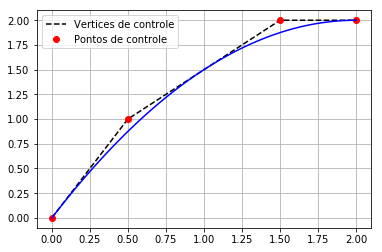

In [26]:
P = [cp_x, u]
curvaSpline2D(P, knots, bases=N)


In [17]:
cp_x